## Supervised Machine Laearning

In [1]:
# Import our dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
%matplotlib inline


from sklearn import tree

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
rotten_tomatoes_df = pd.read_csv('Resources/rotten_tomatoes_movies.csv')

In [3]:
rotten_tomatoes_df.head()


,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,poster_image_url,rating,genre,directors,writers,cast,...,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,/m/0814255,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,https://resizing.flixster.com/p1veUpQ4ktsSHtRu...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",...,20th Century Fox,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,/m/0878835,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,https://resizing.flixster.com/0AbudQ4KsB4BeXSB...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",...,Sony Pictures Classics,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
2,/m/10,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,https://resizing.flixster.com/mF0dxH6UTa0FdkMs...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",...,Waner Bros.,Fresh,68,22,Spilled,53.0,14670.0,2,15,7
3,/m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,https://resizing.flixster.com/u-8xAyGaDVvROLiR...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",...,Criterion Collection,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,/m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",https://resizing.flixster.com/FKExgYBHu07XLoil...,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",...,Disney,Fresh,89,27,Upright,74.0,68860.0,5,24,3


In [4]:
rotten_tomatoes_df.columns


Index(['rotten_tomatoes_link', 'movie_title', 'movie_info',
       'critics_consensus', 'poster_image_url', 'rating', 'genre', 'directors',
       'writers', 'cast', 'in_theaters_date', 'on_streaming_date',
       'runtime_in_minutes', 'studio_name', 'tomatometer_status',
       'tomatometer_rating', 'tomatometer_count', 'audience_status',
       'audience_rating', 'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count'],
      dtype='object')

In [5]:
rotten_tomatoes_df.nunique()

rotten_tomatoes_link             16638
movie_title                      16106
movie_info                       16613
critics_consensus                 8307
poster_image_url                 16623
rating                               8
genre                             1080
directors                         8314
writers                          12121
cast                             16326
in_theaters_date                  5586
on_streaming_date                 2260
runtime_in_minutes                 201
studio_name                       2886
tomatometer_status                   3
tomatometer_rating                 101
tomatometer_count                  393
audience_status                      2
audience_rating                     98
audience_count                   10885
audience_top_critics_count          65
audience_fresh_critics_count       345
audience_rotten_critics_count      203
dtype: int64

In [6]:
rotten_tomatoes_df.dropna(inplace=True)

In [7]:
#application_df.drop(['EIN', 'NAME'],axis=1)
audience_df =rotten_tomatoes_df.drop(['poster_image_url','rotten_tomatoes_link','movie_title', 'movie_info','critics_consensus',
                                      'in_theaters_date','on_streaming_date','directors','runtime_in_minutes',
                                      'genre', 'writers', 'cast','tomatometer_status',
                                      'tomatometer_rating', 'tomatometer_count' ], axis =1 ) 

In [8]:
audience_df.columns

Index(['rating', 'studio_name', 'audience_status', 'audience_rating',
       'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count'],
      dtype='object')

## Tomatometer rating Analysis

In [9]:
#dropping the columns
tomatometer_df =rotten_tomatoes_df.drop(['poster_image_url','rotten_tomatoes_link','movie_title', 'movie_info','critics_consensus',
                                         'in_theaters_date','on_streaming_date','directors',
                                         'genre', 'writers', 'cast', 'studio_name', 'runtime_in_minutes'], axis =1 ) 

In [10]:
tomatometer_df.columns

Index(['rating', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_status', 'audience_rating',
       'audience_count', 'audience_top_critics_count',
       'audience_fresh_critics_count', 'audience_rotten_critics_count'],
      dtype='object')

In [11]:
tomatometer_df['audience_status'].value_counts()

Upright    4462
Spilled    3148
Name: audience_status, dtype: int64

In [12]:
tomatometer_df.dtypes


rating                            object
tomatometer_status                object
tomatometer_rating                 int64
tomatometer_count                  int64
audience_status                   object
audience_rating                  float64
audience_count                   float64
audience_top_critics_count         int64
audience_fresh_critics_count       int64
audience_rotten_critics_count      int64
dtype: object

In [13]:
tomatometer_df['rating'] = tomatometer_df['rating'].map(lambda x: x.rstrip(')'))

In [14]:
tomatometer_df['rating'].value_counts()

R        3423
PG-13    1973
PG       1029
NR        903
G         261
NC17       21
Name: rating, dtype: int64

In [15]:
tomatometer_df.isnull().sum()

rating                           0
tomatometer_status               0
tomatometer_rating               0
tomatometer_count                0
audience_status                  0
audience_rating                  0
audience_count                   0
audience_top_critics_count       0
audience_fresh_critics_count     0
audience_rotten_critics_count    0
dtype: int64

In [16]:
tomatometer_df.nunique()

rating                              6
tomatometer_status                  3
tomatometer_rating                101
tomatometer_count                 386
audience_status                     2
audience_rating                    92
audience_count                   7164
audience_top_critics_count         65
audience_fresh_critics_count      344
audience_rotten_critics_count     199
dtype: int64

tomatometer_status
0    3232
1    1790
2    2588
dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

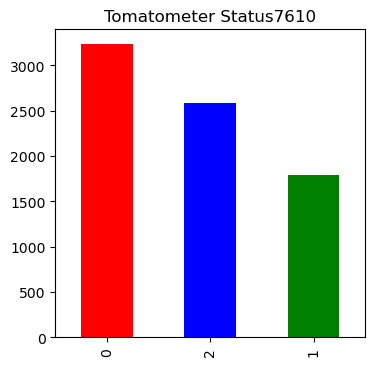

In [36]:
print(tomatometer_df.groupby(['tomatometer_status']).size())

#Bar Chart
index = ['Rotten', 'Fresh', 'Certified Fresh']
tomatometer_plot = tomatometer_df["tomatometer_status"].value_counts(sort= True, ascending = False).plot(kind='bar',
                   figsize=(4,4),title = "Tomatometer Status" + str(tomatometer_df['tomatometer_status'].count()),
                   color= ['Red', 'Blue','Green' ] )

plt.savefig("Images/Tomatometer.png")
plt.show

In [18]:
tomatometer_df = tomatometer_df.replace(to_replace = ['PG','R','NR','NC17','PG-13','G',],value = ['1','2','3','4','5','6'])
tomatometer_df

,rating,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,1,Rotten,49,144,Spilled,53.0,254287.0,38,71,73
1,2,Certified Fresh,86,140,Upright,64.0,11567.0,43,121,19
3,3,Certified Fresh,100,51,Upright,97.0,105000.0,6,51,0
4,6,Fresh,89,27,Upright,74.0,68860.0,5,24,3
5,5,Rotten,8,148,Spilled,37.0,411087.0,36,12,136
...,...,...,...,...,...,...,...,...,...,...
16629,1,Rotten,14,131,Spilled,41.0,44664.0,34,18,113
16630,5,Fresh,64,137,Upright,80.0,944701.0,33,87,50
16631,5,Rotten,23,226,Spilled,20.0,41699.0,47,51,175
16632,1,Rotten,3,66,Spilled,33.0,11327.0,19,2,64


In [19]:
tomatometer_df = tomatometer_df.replace(to_replace = ['Certified Fresh','Fresh', 'Rotten'],value = ['2','1','0'])
tomatometer_df

,rating,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,1,0,49,144,Spilled,53.0,254287.0,38,71,73
1,2,2,86,140,Upright,64.0,11567.0,43,121,19
3,3,2,100,51,Upright,97.0,105000.0,6,51,0
4,6,1,89,27,Upright,74.0,68860.0,5,24,3
5,5,0,8,148,Spilled,37.0,411087.0,36,12,136
...,...,...,...,...,...,...,...,...,...,...
16629,1,0,14,131,Spilled,41.0,44664.0,34,18,113
16630,5,1,64,137,Upright,80.0,944701.0,33,87,50
16631,5,0,23,226,Spilled,20.0,41699.0,47,51,175
16632,1,0,3,66,Spilled,33.0,11327.0,19,2,64


In [20]:
tomatometer_df = tomatometer_df.replace(to_replace = ['Upright', 'Spilled'],value = ['1','0'])
tomatometer_df

,rating,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count
0,1,0,49,144,0,53.0,254287.0,38,71,73
1,2,2,86,140,1,64.0,11567.0,43,121,19
3,3,2,100,51,1,97.0,105000.0,6,51,0
4,6,1,89,27,1,74.0,68860.0,5,24,3
5,5,0,8,148,0,37.0,411087.0,36,12,136
...,...,...,...,...,...,...,...,...,...,...
16629,1,0,14,131,0,41.0,44664.0,34,18,113
16630,5,1,64,137,1,80.0,944701.0,33,87,50
16631,5,0,23,226,0,20.0,41699.0,47,51,175
16632,1,0,3,66,0,33.0,11327.0,19,2,64


In [21]:
tomatometer_df.dtypes

rating                            object
tomatometer_status                object
tomatometer_rating                 int64
tomatometer_count                  int64
audience_status                   object
audience_rating                  float64
audience_count                   float64
audience_top_critics_count         int64
audience_fresh_critics_count       int64
audience_rotten_critics_count      int64
dtype: object

In [22]:
tomatometer_df1=tomatometer_df.drop(['tomatometer_status'],axis=1)

In [23]:
tomatometer_df2 = tomatometer_df.drop(['rating', 'audience_status', 'audience_count',
                                        'audience_top_critics_count','audience_fresh_critics_count', 'audience_rotten_critics_count'],axis=1)
tomatometer_df2.head()

,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,0,49,144,53.0
1,2,86,140,64.0
3,2,100,51,97.0
4,1,89,27,74.0
5,0,8,148,37.0


In [24]:
#type_dummies = pd.get_dummies(df['type'],drop_first=True)  
#df = pd.concat([df,type_dummies],axis=1)
tomatometer_df_dum = pd.get_dummies(tomatometer_df1)
tomatometer_df = pd.concat([tomatometer_df2,tomatometer_df_dum],axis=1)
tomatometer_df.head()

,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,tomatometer_rating,tomatometer_count,audience_rating,audience_count,audience_top_critics_count,audience_fresh_critics_count,audience_rotten_critics_count,rating_1,rating_2,rating_3,rating_4,rating_5,rating_6,audience_status_0,audience_status_1
0,0,49,144,53.0,49,144,53.0,254287.0,38,71,73,1,0,0,0,0,0,1,0
1,2,86,140,64.0,86,140,64.0,11567.0,43,121,19,0,1,0,0,0,0,0,1
3,2,100,51,97.0,100,51,97.0,105000.0,6,51,0,0,0,1,0,0,0,0,1
4,1,89,27,74.0,89,27,74.0,68860.0,5,24,3,0,0,0,0,0,1,0,1
5,0,8,148,37.0,8,148,37.0,411087.0,36,12,136,0,0,0,0,1,0,1,0


In [25]:
tomatometer_df.shape

(7610, 19)

In [26]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = tomatometer_df["tomatometer_status"].values
X = tomatometer_df.drop(columns = "tomatometer_status", axis=1).values

# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [28]:
pd.Series(y_test).value_counts()

0    835
2    615
1    453
dtype: int64

 ## Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb = gnb.fit(X_train_scaled, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test_scaled )
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 81.55543878087231


## Evaluating the model

In [30]:
# Confusion matrix
print("Confusion Matrix")
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
# Classification Report
print("\nClassification Report")
report = classification_report(y_test, y_pred)
print(report)
# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)


Confusion Matrix
[[758  74   3]
 [ 53 285 115]
 [  0 106 509]]

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       835
           1       0.61      0.63      0.62       453
           2       0.81      0.83      0.82       615

    accuracy                           0.82      1903
   macro avg       0.79      0.79      0.79      1903
weighted avg       0.82      0.82      0.82      1903



<function matplotlib.pyplot.show(close=None, block=None)>

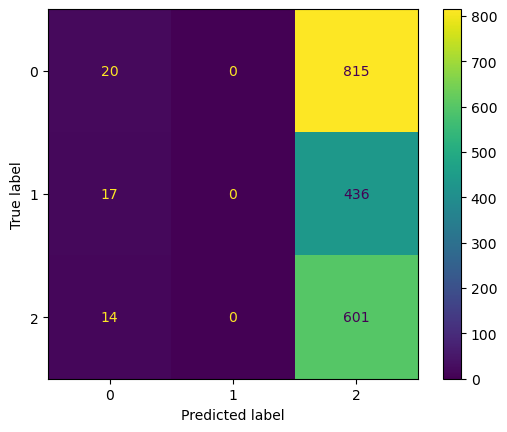

In [37]:
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)

plt.savefig("Images/Cm_est.png")
plt.show

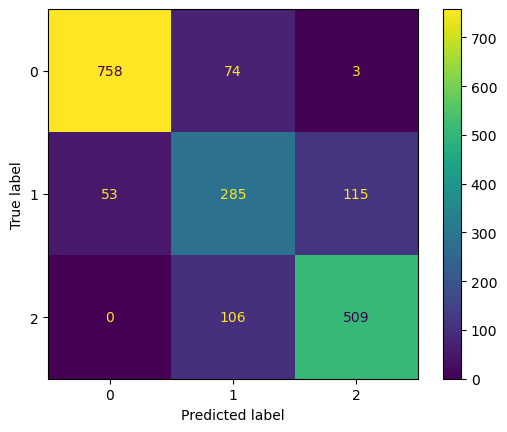

In [38]:
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)
plt.savefig("Images/Cm_pre.png")